## 16. Регуляризация А.Н. Тихонова
Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется *регуляризованной* по отношению к системе
$Ax = b$. Параметр $\alpha$ называется *параметром регуляризации*. 
*Метод регуляризации* А.Н.\,Тихонова заключается в выборе
последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) 
и решении регуляризованных систем
$(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$ для конечного числа
значений $\alpha_k$, и выборе из всех полученных решений того, при котором
норма невязки для исходной системы минимальна.

Написать функцию 
```
    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
```
в которой `A` и `b` – матрица и левая часть исходной системы,
`alpha` – вектор, содержащий набор параметров регуляризации,
`x` – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения 
параметра регуляризации, `discr` – вектор полученных таким образом невязок, `x0` – регуляризованное решение
(из найденных) с минимальной нормой невязки, `discr0`, `alpha0` – соответствующие ему
значения нормы невязки и параметра регуляризации.

Провести эксперимент с плохообусловленными системами из № 8.

Подключим необходимые библиотеки


In [2]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt

Напишем саму функцию, которая будет принимать на вход матрицы A, b и вектор alpha, содержащий набор параметров регуляризации. 
Выдавать функция будет `x0` – регуляризованное решение
(из найденных) с минимальной нормой невязки, `discr0`, `alpha0` – соответствующие ему значения нормы невязки и параметра регуляризации, `x` – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации, `discr` – вектор полученных таким образом невязок.

In [3]:
def tikhonov(A, b, alpha):
    At = np.transpose(A)
    x = []
    discr = []
    for i in range(len(alpha)):
        xx = linalg.solve((At@A + alpha[i]), (At @ b))
        x.append(xx)
        discr_c = linalg.norm(A@xx - b)/linalg.norm(b)
        discr.append(discr_c)
    jmin = 0
    discr0 = discr[0]
    for j in range(len(discr)):
        if discr[j] < discr0:
            jmin = j
            discr0 = discr[j]
    x0 = x[jmin]
    alpha0 = alpha[jmin]
    return (x0, discr0, alpha0, x, discr)


Напишем фукцию, которая будет принимать на вход размерность матрицы, а выдавать плохообусловленную матрицу.

In [4]:
def badMatrix(n):
    C = np.random.uniform(-100, 100, (n, n))
    L = np.tril(C)
    C = np.random.uniform(-100, 100, (n, n))
    U = np.triu(C)
    return L@U

Но для начала проведем эксперимент на обычных матрицах. Сравним значения невязок для обычной системы $Ax = b$ и регуляризованной $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ 

In [5]:
n_vector = np.arange(10, 500, 5)
n_discr0 = []
for i in n_vector:
    A = np.random.uniform(-100, 100, (i, i))
    b = np.random.uniform(-100, 100, i)
    x = linalg.solve(A, b)
    dr = linalg.norm(A@x - b)/linalg.norm(b)
    n_discr0.append(dr)

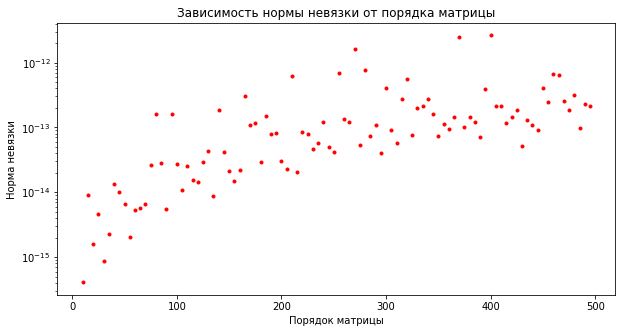

In [6]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.r')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass

In [7]:
n_vector = np.arange(10, 500, 5)
n_alpha0 = []
n_discr0 = []
for i in n_vector:
    A = np.random.uniform(-100, 100, (i, i))
    b = np.random.uniform(-100, 100, i)
    alpha = np.linspace(0.0002 * i, 0.0002, i)
    t = tikhonov(A, b, alpha)
    n_alpha0.append(t[2])
    n_discr0.append(t[1])

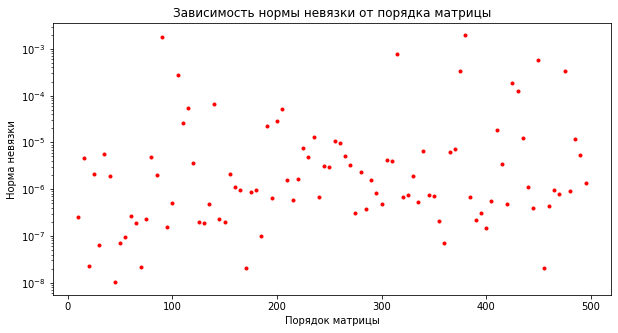

In [8]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.r')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass

Как мы можем заметить, в первом случае, чем больший порядок у матрицы, тем выше значение невязки, во втором же случае такую зависимость пронаблюдать весьма затруднительно.
Так же можно заметить, что во втором случае значения невязки получаются выше, чем в первом.

Теперь проведем те же эксперименты, но для плохообусловленных матриц.

In [ ]:
n_nvector = np.arange(10, 500, 5)
n_discr0 = []
for i in n_nvector:
    A = badMatrix(i)
    b = np.random.uniform(-100, 100, i)
    x = linalg.solve(A, b)
    dr = linalg.norm(A@x - b)/linalg.norm(b)
    n_discr0.append(dr)

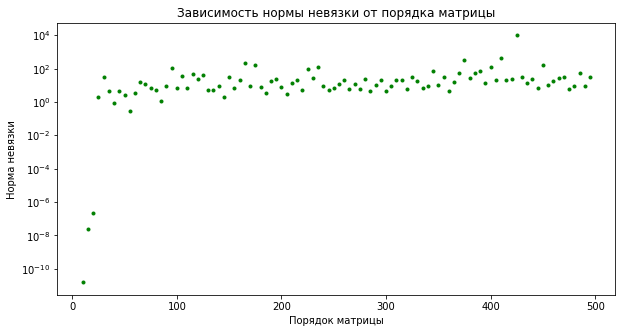

In [7]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.g')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass


Сразу отметим, что у плохообусловленных матриц при решении обычной системы зачение невязки будет во много раз выше, чем у обычной матрицы при том же решении.

In [ ]:
n_vector = np.arange(10, 500, 5)
n_alpha0 = []
n_discr0 = []
for i in n_vector:
    A = badMatrix(i)
    b = np.random.uniform(-100, 100, i)
    alpha = np.linspace(0.0002 * i, 0.0002, i)
    t = tikhonov(A, b, alpha)
    n_alpha0.append(t[2])
    n_discr0.append(t[1])
    

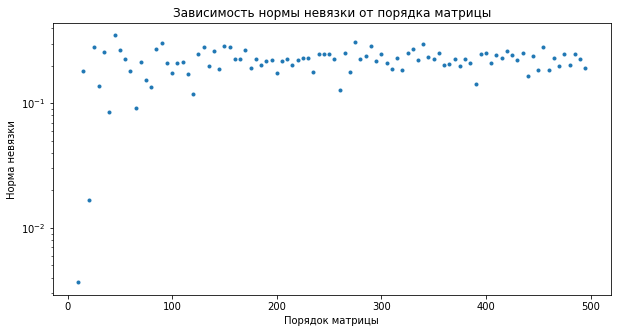

In [9]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass

Значения невязки получились выше, чем в случае с обычными матрицами при решении регуляризованной системы, но ниже, чем в случае с плохообусловленными матрицами при решении обычной системы.

Вывод:
Регуляризованную систему стоит применять, когда мы имеем дело с плохообусловленными матрицы, ведь в среднем значения невязок получаются в несколько раз ниже, чем при решении обычной системой. Однако если мы имеем дело с обычными матрицами, то при применении регуляризованной системы значения невязко получаются выше.